In [3]:

import numpy as np
import pandas as pd
import geopandas as gpd
import pickle
import networkx as nx 
import osmnx as ox 
import numpy as np 
import seaborn as sns 

import pandas as pd
import networkx as nx
from shapely.geometry import Point, LineString
import pickle
from tqdm import tqdm 

import matplotlib.pyplot as plt

import folium

In [4]:
 # read in the road network graph
with open("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/roadNetwork_Venv/data/BaseGraph_eRoad.pickle", 'rb') as file:
    G = pickle.load(file)

with open("/Users/filipmoennilsen/Documents/Skolearbeid/BI_Master_BAN/4. Semester/Master_Thesis/Master_Python/roadNetwork_Venv/data/BaseGraph0_3NOR_wagrades.pickle", 'rb') as file:
    H = pickle.load(file)


/var/folders/67/gxr6c90j7x9_c9pz8lgvd8n40000gn/T/ipykernel_48870/3341442136.py:3: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  G = pickle.load(file)
/var/folders/67/gxr6c90j7x9_c9pz8lgvd8n40000gn/T/ipykernel_48870/3341442136.py:6: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  H = pickle.load(file)


In [5]:
# create a dictionary mapping node IDs to (x, y) coordinates
node_coords = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

In [ ]:
#Plot graph
ox.plot_graph(H, figsize = (10, 15), node_color="red", edge_color = "gray", bgcolor = "white", node_size=1, edge_linewidth = 1)
ox.plot_graph(G, figsize = (10, 15), node_color="red", edge_color = "gray", bgcolor = "white", node_size=1, edge_linewidth = 1)

In [ ]:
# Create an empty dataframe to store node attributes
node_df = pd.DataFrame(columns=['node', "osmid", "latitude", "longitude", 'gradient', "isBridge", "isTunnel", "roadclass", "geometry"])

# Iterate over all nodes in the network
# Note: Generates a lot of output - just erase it after the code has run 
for node in G.nodes:
    # Get the gradient attribute of the node and add it to the dataframe
    osmid = G.nodes[node]["osmid"]
    lat = G.nodes[node]["x"]
    lon = G.nodes[node]["y"]
    isBridge = G.nodes[node]["isBridge"]
    isTunnel = G.nodes[node]["isTunnel"]
    roadclass = G.nodes[node]["roadclass"]
    gradient = G.nodes[node]['elevation']
    geo = G.nodes[node]["geometry"]

    node_df = node_df.append({"osmid": osmid, 'node': node, "latitude": lat, "longitude": lon, 'gradient': gradient, "isBridge": isBridge, "isTunnel": isTunnel, "roadclass": roadclass, "geometry": geo}, ignore_index=True)

In [8]:
# Convert the edge data to a pandas DataFrame
edge_data = G.edges(data=True)
edge_df = pd.DataFrame(edge_data, columns=['source', 'target', 'data_dict'])

# Extract the data into separate columns
edge_df = pd.concat([edge_df.drop('data_dict', axis=1), edge_df['data_dict'].apply(pd.Series)], axis=1)


In [9]:
# Print the resulting DataFrames
display(edge_df.head())
display(node_df.head())

,source,target,id,oneway,ref,name,funcroadclass,roadclass,isFerry,isBridge,isTunnel,speedlim,drivetime,length,length_weight,u,v,grade,grade_abs,geometry
0,155191,155273,138086,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,0.017585,15.291208,15.291208,155191,155273,-0.03,0.03,NaN
1,155191,351348,"[363590, 2168667, 362740, 138014]",False,E6,E6,0,0,0,0,0,110,"[0.19838599168327925, 0.08097851727109437, 0.0...",485.743882,"[129.09618695391856, 35.40442062748214, 4.9757...","[155192, 351173, 351174, 155191]","[155192, 351348, 351173, 351174]","[0.034, 0.013, -0.002, 0.018]","[0.034, 0.013, 0.002, 0.018]",LINESTRING (11.127465806112035 60.786204560258...
2,155191,155201,"[138150, 138118, 138126, 138134, 138142]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,"[0.020742835002232715, 0.007996503314164363, 0...",54.859300,"[3.7483329629162823, 4.644146853710842, 6.9534...","[155201, 155337, 155317, 24154, 155327]","[155337, 155317, 155191, 24154, 155327]","[0.031, -0.018, 0.027, 0.005, 0.018]","[0.031, 0.018, 0.005, 0.027]",LINESTRING (11.127184981853482 60.786428543984...
3,155201,155289,138110,False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,0.013559,11.790339,11.790339,155289,155201,0.013,0.013,NaN
4,155201,351618,"[2168673, 138022, 362732, 363598, 2168670]",False,E6,E6,0,0,0,0,0,110,"[0.025416070719352715, 0.16287845422361258, 0....",377.468769,"[65.06593976101533, 259.6613038347447, 4.91549...","[155200, 351618, 1854868, 351165, 351166]","[155200, 155201, 1854868, 351165, 351166]","[0.028, 0.056, 0.025, 0.053, 0.042]","[0.028, 0.056, 0.025, 0.053, 0.042]",LINESTRING (11.125266280578165 60.789677274131...


,node,osmid,latitude,longitude,gradient,isBridge,isTunnel,roadclass,geometry
0,155191,155191,11.127466,60.786205,143.160,0,0,0,POINT (11.127465806112035 60.78620456025842)
1,155201,155201,11.127185,60.786429,142.700,0,0,0,POINT (11.127184981853482 60.78642854398455)
2,155273,155273,11.127535,60.786334,142.705,0,0,0,POINT (11.127534712389643 60.78633428345484)
3,155289,155289,11.127400,60.786416,142.543,0,0,0,POINT (11.127399824588059 60.786415782679235)
4,155971,155971,11.993829,60.189189,155.408,0,0,0,POINT (11.993829462815306 60.189188517538796)


In [10]:
# Check number of NaN in geometry column
nodes_nans = node_df["geometry"].isna().sum()
print(f"IN NODES:   The column geometry contains {nodes_nans} of", len(node_df), "NaN values.")

edges_nans = edge_df["geometry"].isna().sum()
print(f"IN EDGES:   The column geometry contains {edges_nans} of", len(edge_df), "NaN values.")


IN NODES:   The column geometry contains 0 of 6944 NaN values.
IN EDGES:   The column geometry contains 1629 of 9807 NaN values.


In [11]:
# Drop all edges without a geometry column
edge_df.dropna(subset=["geometry"], inplace=True)
edges_nans = edge_df["geometry"].isna().sum()
print(f"IN EDGES:   The column geometry contains {edges_nans} of", len(edge_df), "NaN values.")
edge_df.head()


IN EDGES:   The column geometry contains 0 of 8178 NaN values.


,source,target,id,oneway,ref,name,funcroadclass,roadclass,isFerry,isBridge,isTunnel,speedlim,drivetime,length,length_weight,u,v,grade,grade_abs,geometry
1,155191,351348,"[363590, 2168667, 362740, 138014]",False,E6,E6,0,0,0,0,0,110,"[0.19838599168327925, 0.08097851727109437, 0.0...",485.743882,"[129.09618695391856, 35.40442062748214, 4.9757...","[155192, 351173, 351174, 155191]","[155192, 351348, 351173, 351174]","[0.034, 0.013, -0.002, 0.018]","[0.034, 0.013, 0.002, 0.018]",LINESTRING (11.127465806112035 60.786204560258...
2,155191,155201,"[138150, 138118, 138126, 138134, 138142]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,"[0.020742835002232715, 0.007996503314164363, 0...",54.859300,"[3.7483329629162823, 4.644146853710842, 6.9534...","[155201, 155337, 155317, 24154, 155327]","[155337, 155317, 155191, 24154, 155327]","[0.031, -0.018, 0.027, 0.005, 0.018]","[0.031, 0.018, 0.005, 0.027]",LINESTRING (11.127184981853482 60.786428543984...
4,155201,351618,"[2168673, 138022, 362732, 363598, 2168670]",False,E6,E6,0,0,0,0,0,110,"[0.025416070719352715, 0.16287845422361258, 0....",377.468769,"[65.06593976101533, 259.6613038347447, 4.91549...","[155200, 351618, 1854868, 351165, 351166]","[155200, 155201, 1854868, 351165, 351166]","[0.028, 0.056, 0.025, 0.053, 0.042]","[0.028, 0.056, 0.025, 0.053, 0.042]",LINESTRING (11.125266280578165 60.789677274131...
5,155273,155289,"[138102, 138094]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,"[0.007400319249563996, 0.006224889557635327]",11.848008,"[5.412947441422023, 6.435060217012172]","[155273, 155281]","[155281, 155289]","[-0.022, -0.007]","[0.022, 0.007]",LINESTRING (11.127534712389643 60.786334283454...
6,155273,191524,"[176720, 176745, 176733]",False,Kjonerudvegen,Kjonerudvegen,0,0,0,0,0,60,"[0.005229397871931829, 0.01727116575823345, 0....",19.941540,"[0.3758324090894773, 4.547302497332026, 15.018...","[155273, 191515, 191500]","[191515, 191500, 191524]","[-0.037, 0.0, -0.03]","[0.037, 0.0, 0.03]",LINESTRING (11.127534712389643 60.786334283454...


In [40]:
# Convert the dataframes to geodataframes, using the "geometry" column as the geometry
edge_gdf = gpd.GeoDataFrame(edge_df, geometry="geometry")
node_gdf = gpd.GeoDataFrame(node_df, geometry="geometry")

In [47]:
# Drop every second row in the dataframe
half_node_gdf = node_gdf.iloc[::2]
half_node_gdf_1 = half_node_gdf.iloc[::2]
half_node_gdf_2 = half_node_gdf.iloc[::2]
half_node_gdf_3 = half_node_gdf.iloc[::2]
half_node_gdf_4 = half_node_gdf.iloc[::2] 
#len(half_node_gdf)

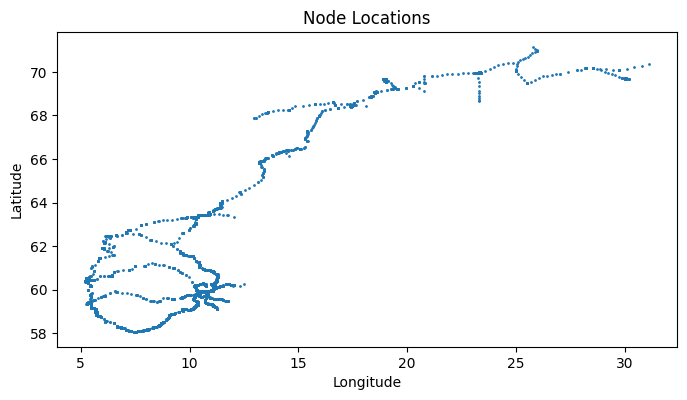

In [46]:
import matplotlib.pyplot as plt

# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(8, 8))
node_gdf.plot(ax=ax, markersize=1)

# Add a title and axis labels
ax.set_title("Node Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()


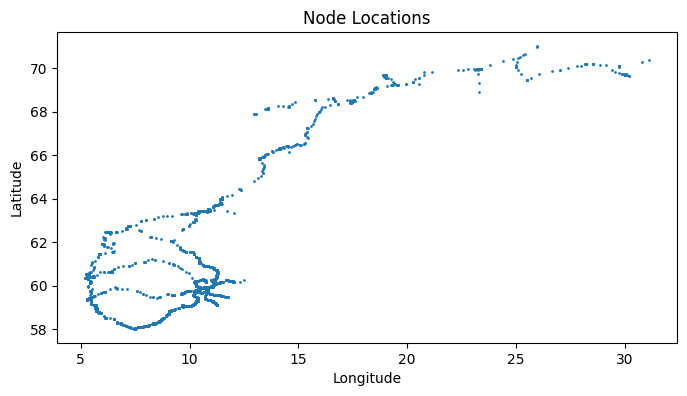

In [268]:
import matplotlib.pyplot as plt

# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(8, 8))
half_node_gdf.plot(ax=ax, markersize=1)

# Add a title and axis labels
ax.set_title("Node Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()


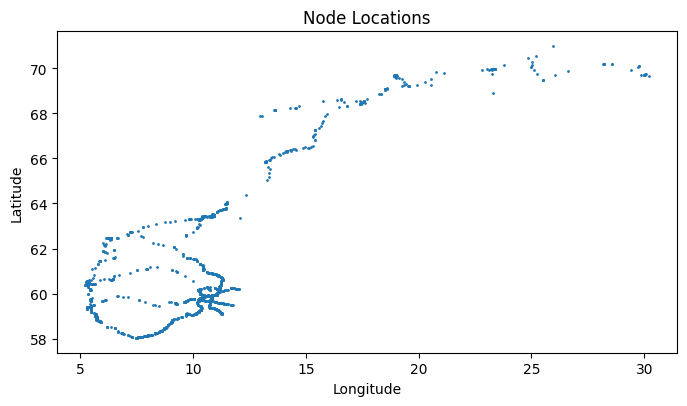

In [48]:
import matplotlib.pyplot as plt

# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(8, 8))
half_node_gdf_1.plot(ax=ax, markersize=1)

# Add a title and axis labels
ax.set_title("Node Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()


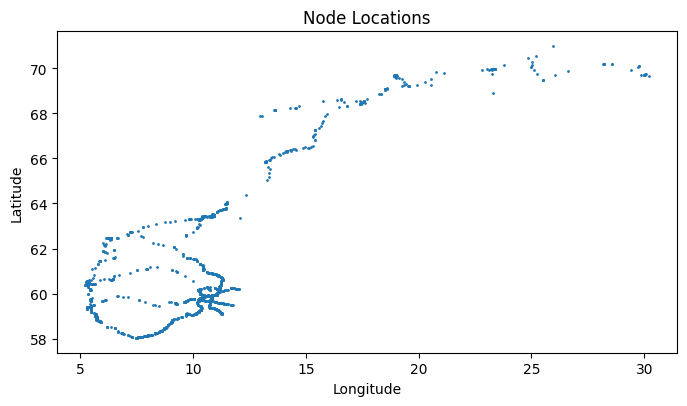

In [49]:
import matplotlib.pyplot as plt

# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(8, 8))
half_node_gdf_2.plot(ax=ax, markersize=1)

# Add a title and axis labels
ax.set_title("Node Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()


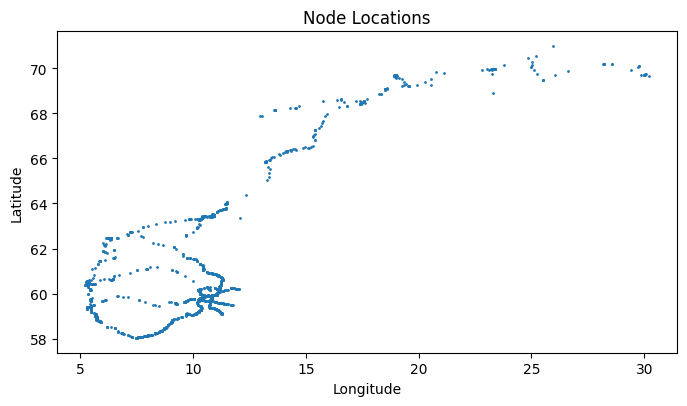

In [50]:
import matplotlib.pyplot as plt

# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(8, 8))
half_node_gdf_3.plot(ax=ax, markersize=1)

# Add a title and axis labels
ax.set_title("Node Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()


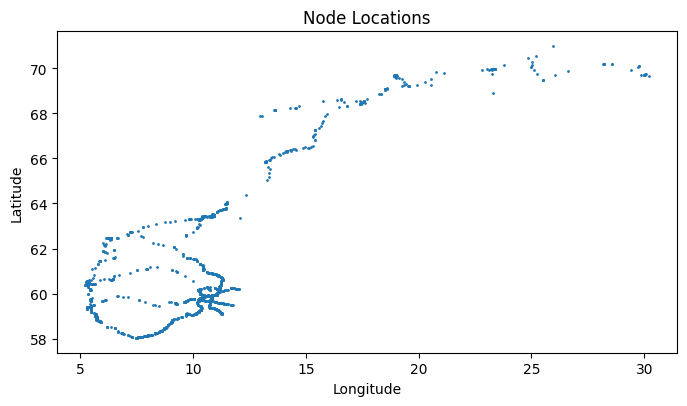

In [51]:
import matplotlib.pyplot as plt

# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(8, 8))
half_node_gdf_4.plot(ax=ax, markersize=1)

# Add a title and axis labels
ax.set_title("Node Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()


In [56]:
node_gdf.head(1)

,node,osmid,latitude,longitude,gradient,isBridge,isTunnel,roadclass,geometry
0,155191,155191,11.127466,60.786205,143.16,0,0,0,POINT (11.12747 60.78620)


In [637]:
# assume node_gdf is already defined as a geodataframe
#new_gdf = node_gdf[(node_gdf['longitude'] <= 61) & (node_gdf['latitude'].between(10, 14))] # Done
#new_gdf = node_gdf[(node_gdf['longitude'].between(55, 59.5)) & (node_gdf['latitude'].between(4,10))] # Done
#new_gdf = node_gdf[(node_gdf['longitude'].between(59.4, 60)) & (node_gdf['latitude'].between(4,10))] # Done
#new_gdf = node_gdf[(node_gdf['longitude'].between(59.9, 61.4)) & (node_gdf['latitude'].between(4,10.4))] # Done
#new_gdf = node_gdf[(node_gdf['longitude'].between(61.2, 65)) & (node_gdf['latitude'].between(4,9))] # Done
#new_gdf = node_gdf[(node_gdf['longitude'].between(60.8, 63)) & (node_gdf['latitude'].between(7,14))] # Done
#new_gdf = node_gdf[(node_gdf['longitude'].between(67, 90)) & (node_gdf['latitude'].between(11, 20))] # Done
new_gdf = node_gdf[(node_gdf['longitude'].between(67, 90)) & (node_gdf['latitude'].between(19.8 ,30))] # Done



In [638]:
len(new_gdf)

234

In [371]:
# Drop every second row in the dataframe
half_new_gdf = new_gdf.iloc[::2]
#half_new_gdf = half_new_gdf.iloc[::2]
#half_new_gdf = half_new_gdf.iloc[::2]
#half_new_gdf = half_new_gdf.iloc[::2]
#half_new_gdf = half_node_gdf.iloc[::2] 
len(half_new_gdf)

369

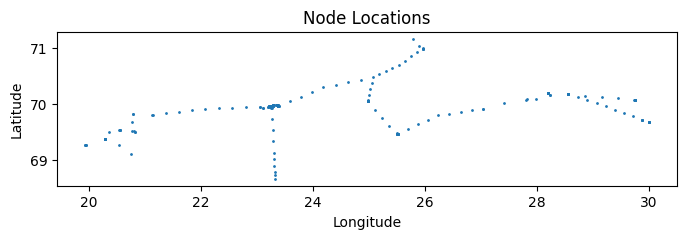

In [639]:
import matplotlib.pyplot as plt

# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(8, 8))
new_gdf.plot(ax=ax, markersize=1)

# Add a title and axis labels
ax.set_title("Node Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()


In [359]:
len(half_new_gdf)

423

In [652]:
# Create a folium map object centered on the first node in the node geodataframe
map_obj = folium.Map(location=[nodes_gdf.geometry.iloc[0].y, nodes_gdf.geometry.iloc[0].x], zoom_start=10)
map_obj_2 = folium.Map(location=[new_gdf.geometry.iloc[0].y, new_gdf.geometry.iloc[0].x], zoom_start=10)


In [653]:
# Create a feature group for the edges
edge_fg = folium.FeatureGroup(name="Edges")

# Add each edge as a line to the feature group, with a popup displaying the edge weight
for i, row in edges_gdf.iterrows():
    popup_str = f"Source: {row['source']}<br>Target: {row['target']}<br>Edge ID: {row['geometry']}"
    folium.PolyLine(locations=[(row.geometry.coords[0][1], row.geometry.coords[0][0]),
                                (row.geometry.coords[1][1], row.geometry.coords[1][0])],
                    popup=popup_str,
                    tooltip=f"Edge ({row['source']}, {row['target']})").add_to(edge_fg)

# Add the edge feature group to the map
edge_fg.add_to(map_obj)

In [654]:
# Create a feature group for the nodes
node_fg = folium.FeatureGroup(name="Nodes")

# Add each node as a marker to the feature group, with a popup displaying the node ID and label
for i, row in nodes_gdf.iterrows():
    popup_str = f"ID: {row['osmid']}<br>Latitude: {row['latitude']}<br>Longitude: {row['longitude']}<br>Gradient: {row['gradient']}']"
    folium.Marker(location=[row.geometry.y, row.geometry.x],
                  popup=popup_str,
                  tooltip=f"Node {row['osmid']}").add_to(node_fg)

# Add the node feature group to the map
node_fg.add_to(map_obj)

In [655]:
# Create a feature group for the nodes
node_fg = folium.FeatureGroup(name="Nodes")

# Add each node as a marker to the feature group, with a popup displaying the node ID and label
for i, row in new_gdf.iterrows():
    popup_str = f"ID: {row['osmid']}<br>Latitude: {row['latitude']}<br>Longitude: {row['longitude']}<br>Gradient: {row['gradient']}<br>Road Class: {row['roadclass']}"
    folium.Marker(location=[row.geometry.y, row.geometry.x],
                  popup=popup_str,
                  tooltip=f"Node {row['osmid']}").add_to(node_fg)

# Add the node feature group to the map
node_fg.add_to(map_obj_2)

In [656]:
# Add a layer control to the map, allowing the user to toggle the visibility of the edge and node feature groups
folium.LayerControl().add_to(map_obj)
folium.LayerControl().add_to(map_obj_2)

In [645]:
# Display the map
map_obj_2

In [657]:
map_obj

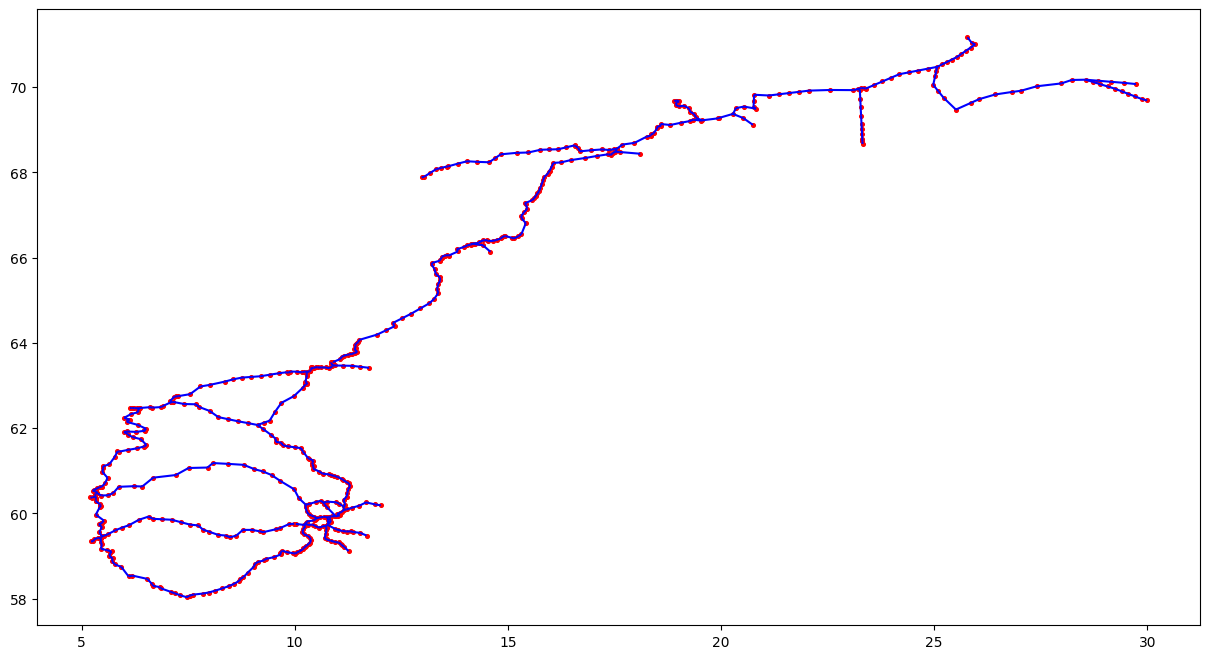

In [664]:
import matplotlib.pyplot as plt

# Set the size of the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the nodes and edges
nodes_gdf.plot(ax=ax, color='red', markersize=7)
edges_gdf.plot(ax=ax, color='blue')

# Show the plot
plt.show()


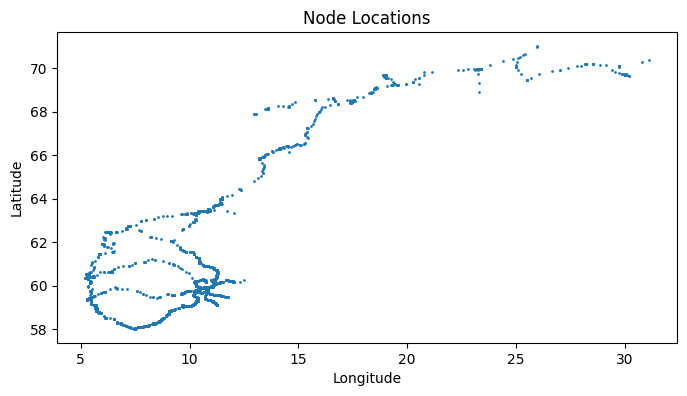

In [269]:
import matplotlib.pyplot as plt

# Create a scatter plot of the node locations
fig, ax = plt.subplots(figsize=(8, 8))
half_node_gdf.plot(ax=ax, markersize=1)

# Add a title and axis labels
ax.set_title("Node Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Set the CRS of the GeoDataFrames
nodes_gdf.crs = 'EPSG:4326'
edges_gdf.crs = 'EPSG:4326'

# Create a map centered on the first node
m = folium.Map(location=[nodes_gdf['latitude'][0], nodes_gdf['longitude'][0]], zoom_start=10)

# Add the edges layer to the map
folium.GeoJson(edges_gdf).add_to(m)

# Add the nodes layer to the map using a marker cluster
mc = MarkerCluster()
for idx, row in nodes_gdf.iterrows():
    mc.add_child(folium.Marker(location=[row['latitude'], row['longitude']]))
mc.add_to(m)

# Display the map
m


In [658]:
node_ids = [
363114, 155191, 351102, 229327, 1287001, 294257, 1210066, # første er Hamar/Ridabu
1550099, 1549832, 1548053, 1166768, 1391983, 1355042, 1540900, 1354548, 1596708,
1831177, 346860, 1361083, 1820460, 273005, 264633, 212063, 264384, 733439,
249770, 1621813, 1620935, 1287788, 226166, 1035188, # Ringmoen
225533, 1804949, 1358093, 
825322, 1401860, 1360772, 1653413, 744348, 655059, 1692454, 322944, 717788, 
1259667, 733331, 717094, 1367541, 1368219, 1359263, 1357128, 
1359748, 1534536, 1363061, 729893, 1068477, 645755,
521003, 734848, 518987, 1356899, 1388481, 1059419, 646017, 
646755, 1498010, 1499783, 1583718, 1583052, 1502720, 1241680,
1356545, 1361908, 475528, 1357826, 473308, 1502547, 1520568, 1502400, 
1502160, 1047298, 1059253, 1059028, 1457640, 1520306, 1359965, 1297915, 
1117282, 344396, 918793, 1160470, 1461371, 419975, 1353166, 1391824, 
1353882, 1457875, 1300885, 591920, 1148914, 1148963, 932927, 875935, 892203, 
815860, 816117, 932076, 938601, 939342, 1525237, 925287, 819302, 819545, 
947862, 837851, 834022, 518394, 1277008, 904906, 1305301, 959684, 
884154, 861726, 778683, 439557, 931408, 935675, 1164626, 1165904, 
917667, 633563, 1835024, 1064864, 1063773, 1058365, 1107032, 
363094, 1169582, 1168841, 1114554, 442791, 939314, 1837088, 
1112692, 1119099, 443012, 1253262, 786013, 359628, 356907, 1244249, 
360832, 974682, 1308424, 1294532, 783491, 352537, 677129, 785659, 
1211419, 1202331, 780210, 373466, 1767627, 1251008, 1306941, 278721, 
1306939, 1220377, 1236482, 518781, 519032, 519215, 1854804, 519657, 
519871, 356470, 1218458, 520142, 950607, 1854811, 520266, 1854850, 
1854805, 1854873, 1757217, 1757294, 1178154, 456094, 960370, 1854799, 
1212916, 1742443, 356803, 1790694, 1714915, 347578, 354561, 1091549,
1753909, 1753950, 1292044, 824526, 1761273, 1311226, 786184, #Sandvik
1854829, 263259, 343979, 120302, 239563, 240306, 338653, 341391, 941568, 
1655795, 981136, 1695865, 1797345, 329937, 1703037, 1761012, 
1751958, 1752000, 1847362, # Vågsbotn
1255189, 1753123, 1244158, 1810129, 1244173, 1447438, 1752379, 
1757410, 1751303, 1762198, 1798422, 1774526, 1754488, 1757182, 
1757211, 1847506, 1752913, 1291319, 1622377, 1757013, 1757052, 
1757063, 1854845, 687472, 1661302, 1342897, 460424, 1854801, 1811243, #Sande 
1662585, 1455254, 1854841, 982313, 1263183, 1242665, 1663567, 
1854835, 1656101, 951446, 664979, 1656119, 1667799, 1854844, 
1670339, 1659666, 1819808, 730907, 320750, 943010, 943332, 
1205589, 1854836, 323551, 645165, 1220506, 945389, 1234021, #Moa
1218653, 1209902, 1207592, 1218415, 1211360, 943633, 1552659, 
1220312, 943904, 943905, 1853430, 
1853486, 1233937, 1854796, 332952, # Åndalsnes
945719, 343936, 944789, 345153, 345690, 1854797, 936216, 1173462, 
345756, 960480, 587711, 1854889, # Vinjeøra 
356032, 355924, 362649, 358102, 326002, 332126, 331992, 232649, 
232847, 232965, 293304, 293574, 293678, 233289, 233695, 328981, 
328559, 1053393, 328043, 328308, 235735, 1161983, 
236596, 236965, 1854846, 1854793, 1854869, 957034, 1854810, 1262340, 
1854867, 1854838, 1854890, 444183, 1114288, 660263, # Soknes
601243, 579725, 556936, 1204452, 981995, 664358, 621046, 
1050156, 656715, #Klett
673595, 673499, 1050042, 622986, 601834, 621503, 621605, 
1591175, 601899, 601845, # trondheim
623104, 579107, 452992, 579231, 255966, 1244855,
982265, 1854859, 1854820, 1854882, 602188, 902303, #ut mot sverige
627813, 628008, 628147, 541335, 203067, 203338, 628790, 
622372, 532078, 628971, 541694, 541794, 567100, 630261, 497797, 592884, #rett før steinkjer
1854837, 1854866, 1240203, 612442, 597346, 582037, 581827, 
581633, 581536, 600113, 621923, 184851, 1854807, 1854874, 621978, 
622201, 1854852, 1854808, 1854875, 634052, 1854809, 826281, 
674327, 375163, 1764735, 429135, 619605, 1854806, 932344, 
659061, 658639, 658705, 658738, 658913, 658947, 
658978, 474029, 474067, 474526, 47559, 474788, 475173, 
475424, 1494993, 984851, #veiskille
395203, 600782, 984889, 984897, 1854822, 975964, 
490719, 368717, 690247, 672996, 1570377, 353427, 1571858, 
374652, 599379, 355303, 354996, 355108, 355216, 785532, 
467677, 348200, 925506, 957739, 476859, 476941, 477134, 
1854802, 1303455, 429248, 1095056, 1854898, 1854865, 
1854912, 1854833, 1854905, 1854888, 1854919, 425412, 
1274054, 1854868, 1854839, 1854891, 426202, 480059, 
480347, 1572082, 1854842, 290493, 253044, 990173, 1170474, #veiskille
1225629, 430614, # mot sverige
331452, #veiskille
431864, 432008, 439279, 1854800, 439585, 1012611, 1012732, 
1012835, 1854861, 1854828, 1854884, 1278515, 1854840, 
975434, 982469, 1854821, 941253, 1854849, 1854803, 
1854872, 283367, 293924, 1854847, 1854794, 1854870, 448431, 1781068, 
331534, 917559, 1854827, 1040580, 918139, 1806461, 739490, 
1616680, 1005467, 1005585, 1016544, 1854826, 1016548, 
1006350, 1006563, 1016827, 644771, #veiskille Nordkjosbotn
1011677, 1011753, 1017172, 1011881, 1011888, 1045653, 
281536, 461376, 935246, 1012112, 1012181, 1226405, 
1017224, 1027717, 1015021,
1016957, 1017026, 323285, #veiskille
1854825, 1010761, 1854795, 665731, 368090, 1854798, 
1854871, 1808899, 1009585, 1854896, 1854860, 1854910, 1854824, 
1854883, 1824695, 978654, #veiskille
1048365, 1854897, 1854862, 1854911, 1854830, 1854904, 
1854885, 1854918, 1854920, 973741, #sverige
979032, 424527, 972167, 1854892, 1854853, 1854906, 1854812, 
1854899, 1854876, 1854913, 973790, #veiskille
1854893, 1854855, 1854907, 1854814, 1854900, 1854878, 
1854914, 1098392, 1854834, 989213, 1854854, 1854813, 
979185, 1854857, 1854817, 1084015, 1854858, 1854909, 
1854902, 1854916, 1100062, 1854815, 1854823, 967923, 1096451, #veiskille
1854863, 1854831, 1854886, 969943, 1854894, 1854856, 
1854908, 1854816, 1854901, 1854879, 1854915, 1096879, 1096416 #ferdig
]

In [627]:
len(node_ids)

552

In [659]:
import geopandas as gpd

# assume node_gdf is already defined as a geodataframe with columns 'id', 'latitude', 'longitude', and 'other_columns'
# assume node_ids is a list of the node IDs you want to keep

# create a boolean mask indicating which rows have the desired IDs
mask = node_gdf['osmid'].isin(node_ids)

# create a new geodataframe with only the desired rows
new_gdf_ids = node_gdf[mask].copy()

# reset the index of the new geodataframe
new_gdf_ids.reset_index(drop=True, inplace=True)


In [660]:
new_gdf_ids

,node,osmid,latitude,longitude,gradient,isBridge,isTunnel,roadclass,geometry
0,155191,155191,11.127466,60.786205,143.160,0,0,0,POINT (11.12747 60.78620)
1,203067,203067,11.101136,63.668650,55.214,0,0,0,POINT (11.10114 63.66865)
2,203338,203338,11.151804,63.699319,18.350,0,0,0,POINT (11.15180 63.69932)
3,212063,212063,10.698420,60.208381,244.068,0,0,0,POINT (10.69842 60.20838)
4,225533,225533,10.279031,60.050953,86.943,0,0,0,POINT (10.27903 60.05095)
...,...,...,...,...,...,...,...,...,...
614,1854915,1854915,29.713911,69.779319,9.884,0,0,0,POINT (29.71391 69.77932)
615,1854916,1854916,26.838489,69.886671,150.777,0,0,0,POINT (26.83849 69.88667)
616,1854918,1854918,23.314782,68.781654,13.682,0,0,0,POINT (23.31478 68.78165)
617,1854919,1854919,15.827419,67.811673,32.114,0,0,0,POINT (15.82742 67.81167)


In [661]:
edges_list =[
   (363114, 155191),
(155191, 351102),
(351102, 229327),
(229327, 1287001),
(1287001, 294257),
(294257, 1210066),
(1210066, 1550099),
(1550099, 1549832),
(1549832, 1548053),
(1548053, 1166768),
(1166768, 1391983),
(1391983, 1355042),
(1355042, 1540900),
(1540900, 1354548),
(1354548, 1596708),
(1596708, 1831177),
(1831177, 346860),
(1166768, 1361083),
(1361083, 1820460),
(1820460, 273005),
(273005, 264633),
(264633, 212063),
(212063, 264384),
(264384, 733439),
(264633, 249770),
(249770, 1621813),
(1621813, 1620935),
(1287788, 226166),
(1620935, 226166),
(226166, 1035188),
(1287788, 225533),
(225533, 1804949),
(1804949, 1358093),
(1358093, 825322),
(825322, 1401860),
(1401860, 1360772),
(1360772, 744348),
(1653413, 744348),
(744348, 655059),
(655059, 1692454),
(1692454, 322944),
(322944, 717788),
(1692454, 1259667),
(1259667, 733331),
(733331, 717094),
(717094, 1367541),
(1367541, 1368219),
(1368219, 1359263),
(1359263, 1357128),
(1367541, 733439),
(1357128, 1359748),
(1359748, 1534536),
(1534536, 1363061),
(1363061, 1391983),
(717788, 729893),
(729893, 1068477),
(733331, 521003),
(521003, 734848),
(734848, 518987),
(518987, 1356899),
(1356899, 1068477),
(1068477, 1388481),
(1388481, 1059419),
(1059419, 646017),
(646017, 1498010),
(1498010, 1499783),
(1499783, 1583718),
(1583718, 1583052),
(1583052, 1502720),
(1502720, 1241680),
(1388481, 1356545),
(1356545, 1361908),
(1361908, 475528),
(475528, 1357826),
(1357826, 473308),
(473308, 1502547),
(1502547, 1520568),
(1520568, 1502400),
(1502400, 1502160),
(1502160, 1047298),
(1047298, 1059253),
(1059253, 1059028),
(1059028, 1457640),
(1457640, 1520306),
(1356545, 1359965),
(1359965, 1297915),
(1297915, 1117282),
(1117282, 344396),
(344396, 918793),
(918793, 1160470),
(1160470, 1461371),
(1461371, 419975),
(419975, 1353166),
(1353166, 1391824),
(1391824, 1353882),
(1353882, 1401860),
(1461371, 1457875),
(1457875, 1300885),
(1457875, 591920),
(591920, 1148914),
(1148914, 1148963),
(1148963, 932927),
(932927, 875935),
(875935, 892203),
(892203, 815860),
(815860, 816117),
(816117, 932076),
(932076, 938601),
(938601, 939342),
(939342, 1525237),
(1525237, 925287),
(925287, 819302),
(819302, 819545),
(819545, 947862),
(947862, 837851),
(837851, 834022),
(834022, 518394),
(518394, 1277008),
(1277008, 904906),
(904906, 1305301),
(1305301, 959684),
(959684, 884154),
(884154, 861726),
(861726, 778683),
(778683, 439557),
(439557, 931408),
(931408, 1164626),
(931408, 935675),
(935675, 1164626),
(1164626, 1165904),
(1165904, 917667),
(917667, 633563),
(633563, 1835024),
(1835024, 1064864),
(1064864, 1063773),
(1063773, 1058365),
(1058365, 1107032),
(1107032, 363094),
(363094, 1169582),
(1169582, 1168841),
(1168841, 1114554),
(1114554, 442791),
(442791, 939314),
(939314, 1837088),
(1837088, 1112692),
(1112692, 1119099),
(1119099, 443012),
(443012, 1253262),
(1253262, 786013),
(786013, 359628),
(359628, 356907),
(356907, 1244249),
(1244249, 360832),
(360832, 974682),
(974682, 1308424),
(1308424, 1294532),
(1294532, 783491),
(783491, 352537),
(352537, 677129),
(677129, 785659),
(785659, 1211419),
(1211419, 1202331),
(1202331, 780210),
(373466, 1767627),
(1767627, 1251008),
(1251008, 1306941),
(278721, 1306939),
(1306939, 1220377),
(1220377, 1236482),
(1236482, 518781),
(518781, 519032),
(519032, 519215),
(519215, 1854804),
(1854804, 519657),
(519657, 519871),
(519871, 356470),
(356470, 1218458),
(1218458, 520142),
(520142, 950607),
(950607, 1854811),
(1854811, 520266),
(520266, 1854850),
(1854850, 1854805),
(1854805, 1854873),
(1854873, 1757217),
(1757217, 1757294),
(1757294, 1178154),
(1178154, 456094),
(456094, 960370),
(960370, 1854799),
(1854799, 1212916),
(1212916, 1742443),
(1742443, 356803),
(356803, 1790694),
(356803, 1714915),
(1714915, 347578),
(347578, 354561),
(354561, 373466),
(373525, 1091549),
(1790694, 1753909),
(1753909, 1753950),
(1753950, 1292044),
(1292044, 824526),
(1292044, 1761273),
(1761273, 1311226),
(1311226, 786184),
(780210, 347578),
(1035188, 1854829),
(1854829, 263259),
(263259, 343979),
(343979, 120302),
(120302, 239563),
(239563, 240306),
(240306, 338653),
(338653, 341391),
(341391, 941568),
(941568, 1655795),
(1655795, 981136),
(981136, 1695865),
(1695865, 1797345),
(1797345, 329937),
(329937, 1703037),
(1703037, 1761012),
(1761012, 1751958),
(1751958, 1752000),
(1752000, 1847362),
(786184, 1255189),
(1255189, 1753123),
(1753123, 1244158),
(1244158, 1810129),
(1810129, 1244173),
(1244173, 1447438),
(1447438, 1752379),
(1752379, 1757410),
(1757410, 1751303),
(1751303, 1762198),
(1762198, 1798422),
(1798422, 1774526),
(1751303, 1754488),
(1754488, 1757182),
(1757182, 1757211),
(1757211, 1847362),
(1847362, 1847506),
(1847506, 1752913),
(1752913, 1291319),
(1291319, 1622377),
(1622377, 1757013),
(1757013, 1757052),
(1757052, 1757063),
(1757063, 1854845),
(1854845, 687472),
(687472, 1661302),
(1661302, 1342897),
(1342897, 460424),
(460424, 1854801),
(1854801, 1811243),
(1811243, 1662585),
(1662585, 1455254),
(1455254, 1854841),
(1854841, 982313),
(982313, 1263183),
(1263183, 1242665),
(1242665, 1663567),
(1663567, 1854835),
(1854835, 1656101),
(1656101, 951446),
(951446, 664979),
(664979, 1656119),
(1656119, 1667799),
(1667799, 1854844),
(1854844, 1670339),
(1670339, 1659666),
(1659666, 1819808),
(1819808, 730907),
(730907, 320750),
(320750, 943010),
(943010, 943332),
(943332, 1205589),
(1205589, 1854836),
(1854836, 323551),
(323551, 645165),
(645165, 1220506),
(1220506, 945389),
(945389, 1234021),
(1234021, 1218653),
(1218653, 1209902),
(1209902, 1207592),
(1207592, 1218415),
(1218415, 1211360),
(1234021, 943633),
(943633, 1552659),
(1552659, 1220312),
(1220312, 943904),
(943904, 943905),
(943905, 1853430),
(1853430, 1853486),
(1853486, 1233937),
(1233937, 1854796),
(1854796, 332952),
(1853430, 945719),
(945719, 343936),
(343936, 944789),
(944789, 345153),
(345153, 345690),
(345690, 1854797),
(1854797, 936216),
(936216, 1173462),
(1173462, 345756),
(345756, 960480),
(960480, 587711),
(587711, 1854889),
(363114, 356032),
(356032, 355924),
(355924, 362649),
(362649, 358102),
(358102, 326002),
(326002, 332126),
(332126, 331992),
(331992, 232649),
(232649, 232847),
(232847, 232965),
(232965, 293304),
(293304, 293574),
(293574, 293678),
(293678, 233289),
(233289, 233695),
(233695, 328981),
(328981, 328559),
(328559, 1053393),
(1053393, 328043),
(328043, 328308),
(328308, 235735),
(235735, 1161983),
(1161983, 236596),
(236596, 236965),
(236965, 1854846),
(1854846, 1854793),
(1854793, 1854869),
(1854869, 957034),
(957034, 1854810),
(1854810, 1262340),
(1262340, 332952),
(236965, 1854867),
(1854867, 1854838),
(1854838, 1854890),
(1854890, 444183),
(444183, 1114288),
(1114288, 660263),
(660263, 601243),
(601243, 579725),
(579725, 556936),
(556936, 1204452),
(1204452, 981995),
(981995, 664358),
(664358, 621046),
(621046, 1050156),
(1050156, 656715),
(656715, 673595),
(673595, 673499),
(673499, 1050042),
(1050042, 622986),
(622986, 601834),
(601834, 621503),
(621503, 621605),
(621605, 623104),
(1591175, 601899),
(601899, 601845),
(601845, 601834),
(623104, 579107),
(579107, 452992),
(452992, 579231),
(579231, 255966),
(255966, 1244855),
(1244855, 982265),
(982265, 1854859),
(1854859, 1854820),
(1854820, 1854882),
(1854882, 602188),
(602188, 902303),
(1244855, 627813),
(627813, 628008),
(628147, 541335),
(541335, 203067),
(203067, 203338),
(203338, 628790),
(628790, 622372),
(622372, 532078),
(532078, 628971),
(628971, 541694),
(541694, 541794),
(541794, 567100),
(567100, 630261),
(630261, 497797),
(497797, 592884),
(1854889, 1854837),
(1854837, 1854866),
(1854866, 1240203),
(1240203, 612442),
(612442, 597346),
(597346, 582037),
(582037, 581827),
(581827, 581633),
(581633, 581536),
(581536, 656715),
(592884, 600113),
(600113, 621923),
(621923, 1854807),
(1854807, 1854874),
(1854874, 621978),
(621978, 622201),
(622201, 1854852),
(1854852, 1854808),
(1854808, 1854875),
(1854875, 634052),
(634052, 1854809),
(1854809, 826281),
(826281, 674327),
(674327, 375163),
(375163, 1764735),
(1764735, 429135),
(429135, 619605),
(619605, 1854806),
(1854806, 932344),
(932344, 659061),
(659061, 658705),
(658705, 658738),
(658738, 658913),
(658913, 658947),
(658947, 658978),
(658978, 474029),
(474029, 474067),
(474067, 474526),
(474526, 474788),
(474788, 475173),
(475173, 475424),
(475424, 1494993),
(1494993, 984851),
(984851, 395203),
(395203, 600782),
(984851, 984889),
(984889, 984897),
(984897, 1854822),
(1854822, 975964),
(984851, 490719),
(490719, 368717),
(368717, 690247),
(690247, 1570377),
(1570377, 353427),
(353427, 1571858),
(1571858, 374652),
(374652, 599379),
(599379, 355303),
(355303, 354996),
(354996, 355108),
(355108, 355216),
(355216, 785532),
(785532, 467677),
(467677, 348200),
(348200, 925506),
(925506, 957739),
(957739, 476859),
(476859, 476941),
(476941, 477134),
(477134, 1854802),
(1854802, 1303455),
(1303455, 429248),
(429248, 1095056),
(1095056, 1854898),
(1854898, 1854865),
(1854865, 1854912),
(1854912, 1854833),
(1854833, 1854905),
(1854905, 1854888),
(1854888, 1854919),
(1854919, 425412),
(425412, 1274054),
(1274054, 1854868),
(1854868, 1854839),
(1854839, 1854891),
(1854891, 426202),
(426202, 480059),
(480059, 480347),
(480347, 1572082),
(1572082, 1854842),
(1854842, 290493),
(290493, 253044),
(253044, 990173),
(990173, 1170474),
(1170474, 1225629),
(1225629, 430614),
(1170474, 331452),
(331452, 431864),
(431864, 432008),
(432008, 439279),
(439279, 1854800),
(1854800, 439585),
(439585, 1012611),
(1012611, 1012732),
(1012732, 1012835),
(1012835, 1854861),
(1854861, 1854828),
(1854828, 1854884),
(1854884, 1278515),
(1278515, 1854840),
(1854840, 975434),
(975434, 982469),
(982469, 1854821),
(1854821, 941253),
(941253, 1854849),
(1854849, 1854803),
(1854803, 1854872),
(1854872, 283367),
(283367, 293924),
(293924, 1854847),
(1854847, 1854794),
(1854794, 1854870),
(1854870, 448431),
(448431, 1781068),
(331452, 331534),
(331534, 917559),
(917559, 1854827),
(1854827, 1040580),
(1040580, 918139),
(918139, 1806461),
(1806461, 739490),
(739490, 1616680),
(1616680, 1005467),
(1005467, 1005585),
(1005585, 1016544),
(1016544, 1854826),
(1854826, 1016548),
(1016548, 1006350),
(1006350, 1006563),
(1006563, 1016827),
(1016827, 644771),
(644771, 1011677),
(1011677, 1011753),
(1011753, 1017172),
(1017172, 1011881),
(1011881, 1011888),
(1011888, 1045653),
(1045653, 281536),
(281536, 461376),
(461376, 935246),
(935246, 1012112),
(1012112, 1012181),
(1012181, 1226405),
(1226405, 1017224),
(1017224, 1027717),
(1027717, 1015021),
(644771, 1016957),
(1016957, 1017026),
(1017026, 323285),
(323285, 1854825),
(1854825, 1010761),
(323285, 1854795),
(1854795, 665731),
(665731, 368090),
(368090, 1854798),
(1854798, 1854871),
(1854871, 1808899),
(1808899, 1009585),
(1009585, 1854896),
(1854896, 1854860),
(1854860, 1854910),
(1854910, 1854824),
(1854824, 1854883),
(1854883, 1824695),
(1824695, 978654),
(978654, 1048365),
(1048365, 1854897),
(1854897, 1854862),
(1854862, 1854911),
(1854911, 1854830),
(1854830, 1854904),
(1854904, 1854885),
(1854885, 1854918),
(1854918, 1854920),
(1854920, 973741),
(978654, 979032),
(979032, 424527),
(424527, 972167),
(972167, 1854892),
(1854892, 1854853),
(1854853, 1854906),
(1854906, 1854812),
(1854812, 1854899),
(1854899, 1854876),
(1854876, 1854913),
(1854913, 973790),
(973790, 1854893),
(1854893, 1854855),
(1854855, 1854907),
(1854907, 1854814),
(1854814, 1854900),
(1854900, 1854878),
(1854878, 1854914),
(1854914, 1098392),
(1098392, 1854834),
(1854834, 989213),
(973790, 1854854),
(1854854, 1854813),
(1854813, 979185),
(979185, 1854857),
(1854857, 1854817),
(1854817, 1084015),
(1084015, 1854858),
(1854858, 1854909),
(1854909, 1854902),
(1854902, 1854916),
(1854916, 1100062),
(1100062, 1854815),
(1854815, 1854823),
(1854823, 967923),
(967923, 1096451),
(1096451, 1854863),
(1854863, 1854831),
(1854831, 1854886),
(1854886, 969943),
(1096451, 1854894),
(1854894, 1854856),
(1854856, 1854908),
(1854908, 1854816),
(1854816, 1854901),
(1854901, 1854879),
(1854879, 1854915),
(1854915, 1096879),
(1096879, 1096416)
    ] 

<AxesSubplot: >

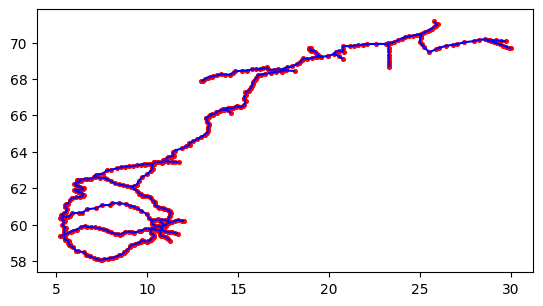

In [662]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Create a dictionary mapping node IDs to their geometry
node_dict = dict(zip(new_gdf_ids['osmid'], new_gdf_ids['geometry']))

# Create a list of LineString objects representing the edges
lines = []
for src, tgt in edges_list:
    if src in node_dict and tgt in node_dict:
        lines.append(LineString([node_dict[src], node_dict[tgt]]))

# Create a new GeoDataFrame with the edges and their source and target nodes
edges_gdf = gpd.GeoDataFrame({'source': [src for src, tgt in edges_list if src in node_dict and tgt in node_dict], 
                              'target': [tgt for src, tgt in edges_list if src in node_dict and tgt in node_dict],
                              'geometry': lines})

# Create a GeoDataFrame for the nodes
nodes_gdf = gpd.GeoDataFrame(new_gdf_ids[['osmid', 'latitude', 'longitude', 'gradient']], geometry=new_gdf_ids['geometry'])

# Plot the nodes and edges
ax = nodes_gdf.plot(color='red', markersize=7)
edges_gdf.plot(ax=ax, color='blue')


In [287]:
edges_gdf.head()

,source,target,geometry
0,363114,155191,"LINESTRING (11.11829 60.80021, 11.12747 60.78620)"
1,155191,351102,"LINESTRING (11.12747 60.78620, 11.22847 60.72376)"
2,351102,229327,"LINESTRING (11.22847 60.72376, 11.27194 60.70256)"
3,229327,1287001,"LINESTRING (11.27194 60.70256, 11.29846 60.63299)"
4,1287001,294257,"LINESTRING (11.29846 60.63299, 11.25567 60.56310)"


<AxesSubplot: >

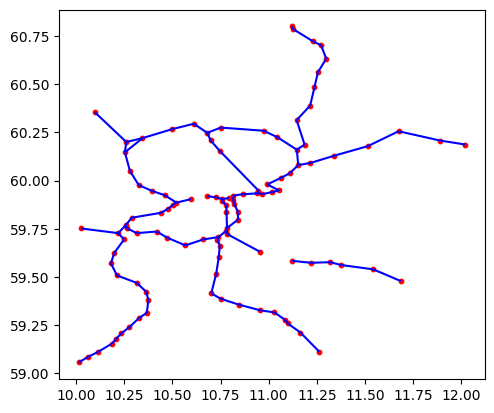

In [177]:
# Plot the nodes and edges
ax = nodes_gdf.plot(color='red', markersize=10)
edges_gdf.plot(ax=ax, color='blue')

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Create a dictionary mapping node IDs to their geometry
node_dict = dict(zip(new_gdf_ids['osmid'], new_gdf_ids['geometry']))

# Create a list of LineString objects representing the edges
lines = [LineString([node_dict[src], node_dict[tgt]]) for src, tgt in edges_list]

# Create a new GeoDataFrame with the edges and their source and target nodes
edges_gdf = gpd.GeoDataFrame({'source': [src for src, tgt in edges_list], 
                              'target': [tgt for src, tgt in edges_list],
                              'geometry': lines})

# Create a GeoDataFrame for the nodes
nodes_gdf = gpd.GeoDataFrame(new_gdf_ids[['id', 'latitude', 'longitude', 'gradient']], geometry=new_gdf_ids['geometry'])

# Plot the nodes and edges
ax = nodes_gdf.plot(color='red', markersize=10)
edges_gdf.plot(ax=ax, color='blue')


In [ ]:
import geopandas as gpd
from shapely.geometry import LineString

# Create a list of LineString objects representing the edges
lines = [LineString([new_gdf_ids.loc[src]['geometry'], new_gdf_ids.loc[tgt]['geometry']]) for src, tgt in edges_list]

# Create a new GeoDataFrame with the edges and their source and target nodes
edges_gdf = gpd.GeoDataFrame({'source': [src for src, tgt in edges_list], 
                              'target': [tgt for src, tgt in edges_list],
                              'geometry': lines})


In [ ]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# assume node_gdf is already defined as a geodataframe with columns 'id', 'latitude', 'longitude', 'gradient', and 'geometry'
# assume edges_dict is a dictionary mapping node IDs to (source, target) tuples

# create a list of edge geometries
edge_geometries = []
for source_id, target_id in edges_dict.values():
    source_geometry = node_gdf[node_gdf['id'] == source_id]['geometry'].values[0]
    target_geometry = node_gdf[node_gdf['id'] == target_id]['geometry'].values[0]
    edge_geometry = LineString([source_geometry, target_geometry])
    edge_geometries.append(edge_geometry)

# create a geodataframe of edges
edges_gdf = gpd.GeoDataFrame(geometry=edge_geometries)

# print the resulting geodataframe
print(edges_gdf)


In [ ]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# assume node_gdf is already defined as a geodataframe with columns 'id', 'latitude', 'longitude', 'gradient', and 'geometry'
# assume edges_dict is a dictionary mapping node IDs to (source, target) tuples

# create a list of edge geometries
edge_geometries = []
for source_id, target_id in edges_dict.values():
    source_geometry = node_gdf[node_gdf['id'] == source_id]['geometry'].values[0]
    target_geometry = node_gdf[node_gdf['id'] == target_id]['geometry'].values[0]
    edge_geometry = LineString([source_geometry, target_geometry])
    edge_geometries.append(edge_geometry)

# create a geodataframe of edges
edges_gdf = gpd.GeoDataFrame(geometry=edge_geometries)

# print the resulting geodataframe
print(edges_gdf)


In [156]:
from math import radians, sin, cos, sqrt, atan2

# define the coordinates of the two points
lon1, lat1 = radians(11.078798), radians(60.834064)
lon2, lat2 = radians(11.127466), radians(60.786205)

# define the radius of the Earth in meters
R = 6371000

# calculate the differences in longitude and latitude
d_lon = lon2 - lon1
d_lat = lat2 - lat1

# apply the Haversine formula
a = sin(d_lat/2)**2 + cos(lat1) * cos(lat2) * sin(d_lon/2)**2
c = 2 * atan2(sqrt(a), sqrt(1-a))
distance = R * c

# print the distance in meters
print(distance)

5940.207481530674


In [157]:
distance_km = distance / 1000
print(distance_km)


5.940207481530674


In [149]:
new_gdf_ids = new_gdf_ids.drop_duplicates('osmid')

In [122]:
from sklearn.neighbors import KDTree
import geopandas as gpd
import pandas as pd


In [123]:
# create a numpy array of the latitude and longitude columns
node_coords = new_gdf_ids[['latitude', 'longitude']].to_numpy()

# create a KDTree using the node coordinates
tree = KDTree(node_coords)


In [142]:
# query the tree for the nearest neighbors within a given distance threshold
threshold = 10 # adjust this value as needed
distances, indices = tree.query_radius(node_coords, r=threshold, return_distance=True)

In [128]:
# create a dictionary mapping node IDs to their index positions
id_to_index = dict(zip(new_gdf_ids['osmid'], new_gdf_ids.index))

In [144]:
new_gdf_ids.loc[0]['osmid']

155191

In [151]:
# create a dictionary mapping node IDs to lists of index positions
id_to_index = {}
for i, node_id in enumerate(new_gdf_ids['osmid']):
    if node_id not in id_to_index:
        id_to_index[node_id] = []
    id_to_index[node_id].append(i)

In [152]:
# create a list of edges using the nearest neighbors
edges = []
for i, neighbors in enumerate(indices):
    for j in neighbors:
        if i != j: # exclude self-loops
            # look up the node IDs using the index positions and the dictionary
            source_id = new_gdf_ids.iloc[i]['osmid']
            target_id = new_gdf_ids.iloc[j]['osmid']
            # create a tuple of the node IDs for the edge
            edge = (source_id, target_id)
            edges.append(edge)

TypeError: Cannot index by location index with a non-integer key

In [ ]:
from sklearn.neighbors import KDTree
import geopandas as gpd
import pandas as pd

# assume node_gdf is already defined as a geodataframe with columns 'osmid', 'latitude', 'longitude', and 'other_columns'
# assume node_ids is a list of the node IDs you want to keep

# create a boolean mask indicating which rows have the desired IDs
mask = node_gdf['osmid'].isin(node_ids)

# create a new geodataframe with only the desired rows
new_gdf_ids = node_gdf.loc[mask, ['osmid', 'latitude', 'longitude']].reset_index(drop=True)

# create a numpy array of the latitude and longitude columns
node_coords = new_gdf_ids[['latitude', 'longitude']].to_numpy()

# create a KDTree using the node coordinates
tree = KDTree(node_coords)

# query the tree for the nearest neighbors within a given distance threshold
threshold = 0.1 # adjust this value as needed
distances, indices = tree.query_radius(node_coords, r=threshold, return_distance=True)

# create a dictionary mapping node IDs to their index positions
id_to_index = dict(zip(new_gdf_ids['osmid'], new_gdf_ids.index))

# create a list of edges using the nearest neighbors
edges = []
for i, neighbors in enumerate(indices):
    for j in neighbors:
        if i != j: # exclude self-loops
            # look up the node IDs using the index positions and the dictionary
            source_id = new_gdf_ids.iloc[i]['osmid']
            target_id = new_gdf_ids.iloc[j]['osmid']
            # create a tuple of the node IDs for the edge
            edge = (source_id, target_id)
            edges.append(edge)

# create a dataframe of edges
edges_df = pd.DataFrame(edges, columns=['source', 'target'])

# create a geodataframe of edges
edges_gdf = gpd.GeoDataFrame(edges_df.merge(node_gdf[['osmid', 'geometry']], how='left', left_on='source', right_on='osmid').rename(columns={'geometry': 'source_geometry'}).drop('osmid', axis=1))
edges_gdf = edges_gdf.merge(node_gdf[['osmid', 'geometry']], how='left', left_on='target', right_on='osmid').rename(columns={'geometry': 'target_geometry'}).drop('osmid', axis=1)
edges_gdf['geometry'] = edges_gdf.apply(lambda row: LineString([row['source_geometry'], row['target_geometry']]), axis=1)
edges_gdf = edges_gdf.drop(['source_geometry', 'target_geometry'], axis=1)


In [ ]:
# create a list of edges using the nearest neighbors
edges = []
for i, neighbors in enumerate(indices):
    for j in neighbors:
        if i != j: # exclude self-loops
            # create a tuple of the node IDs for the edge
            edge = (new_gdf_ids.iloc[i]['id'], new_gdf_ids.iloc[j]['id'])
            edges.append(edge)

# create a dataframe of edges
edges_df = pd.DataFrame(edges, columns=['source', 'target'])

# create a geodataframe of edges
edges_gdf = gpd.GeoDataFrame(edges_df.merge(new_gdf_ids[['id', 'geometry']], how='left', left_on='source', right_on='id').rename(columns={'geometry': 'source_geometry'}).drop('id', axis=1))
edges_gdf = edges_gdf.merge(new_gdf_ids[['id', 'geometry']], how='left', left_on='target', right_on='id').rename(columns={'geometry': 'target_geometry'}).drop('id', axis=1)
edges_gdf['geometry'] = edges_gdf.apply(lambda row: LineString([row['source_geometry'], row['target_geometry']]), axis=1)
edges_gdf = edges_gdf.drop(['source_geometry', 'target_geometry'], axis=1)
